In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('../input/titanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# number of null data
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### How many survived?

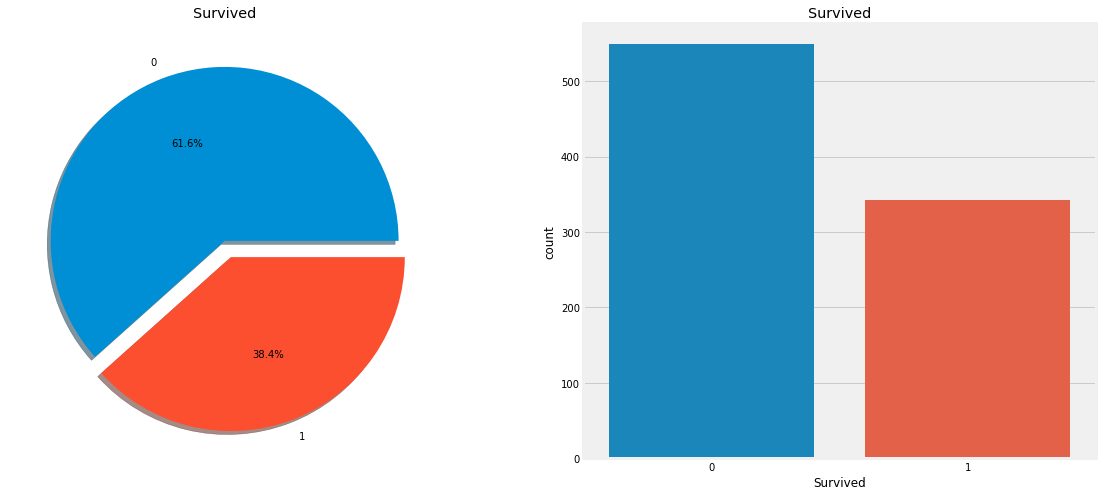

In [5]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')

plt.show()

61.6% 사망 38.4% 생존.
생존인원 약 340~350명

### Sex
성별이 생존에 영향을 미치는가?

In [6]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

여성이 남성보다 많이 생존한 것을 알 수 있다.

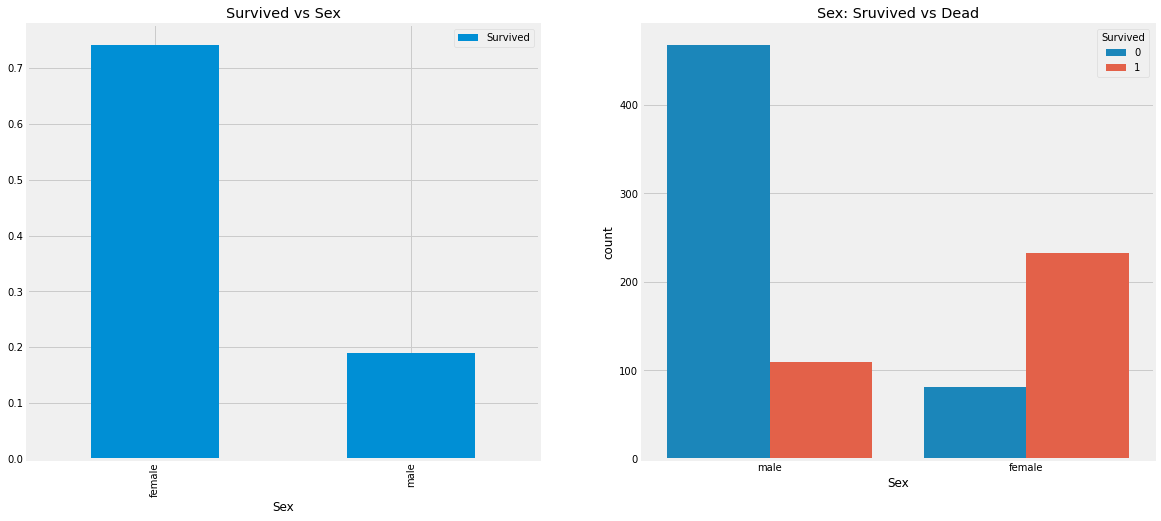

In [7]:
# visualize
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Sruvived vs Dead')

plt.show()

여성은 약75%, 남성은 약19%가량 생존.

### Pclass
좌석 등급이 생존에 미치는 영향을 알아보자

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [9]:
# 심심하니까 style을 입혀주자. 보기도 편하고..
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


좌석 등급이 높을수록(1이 높음) 생존을 많이한 것을 알 수 있다.

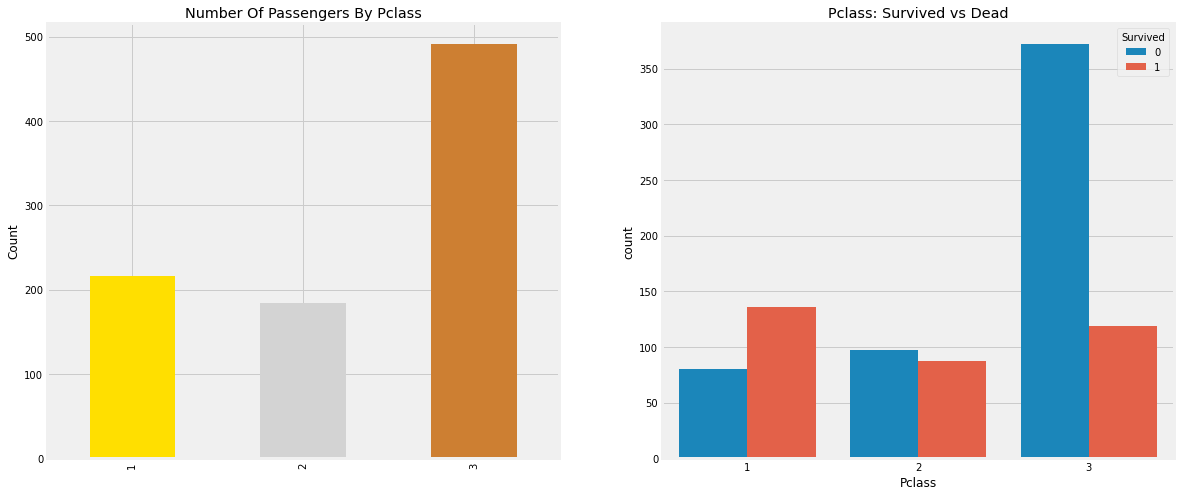

In [10]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')

plt.show()

왼쪽은 좌석 등급별 승객 수, 오른쪽은 사망/생존 수를 보여준다.
좌석 등급이 높을수록 생존률이 높은 것을 알 수 있다.

성별, 좌석 등급별 사망/생존 수를 아래와 같이 표로 볼 수 있다.

In [11]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

한 눈에 보기 쉽게 그래프로 나타내보자

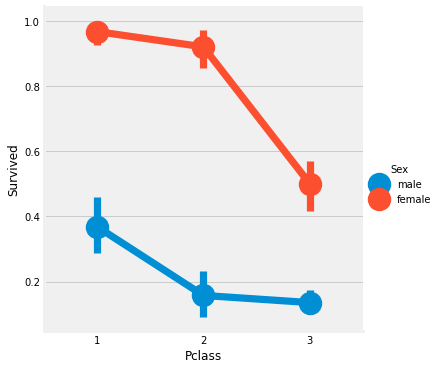

In [12]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

### Age
나이가 생존에 영향을 미치는지 확인해보자

In [13]:
# 우선 가장 나이가 많은 사람, 적은 사람, 승객 나이 평균을 보자
print('Oldest: ', data['Age'].max())
print('Youngest: ', data['Age'].min())
print('Average: ', data['Age'].mean())

Oldest:  80.0
Youngest:  0.42
Average:  29.69911764705882


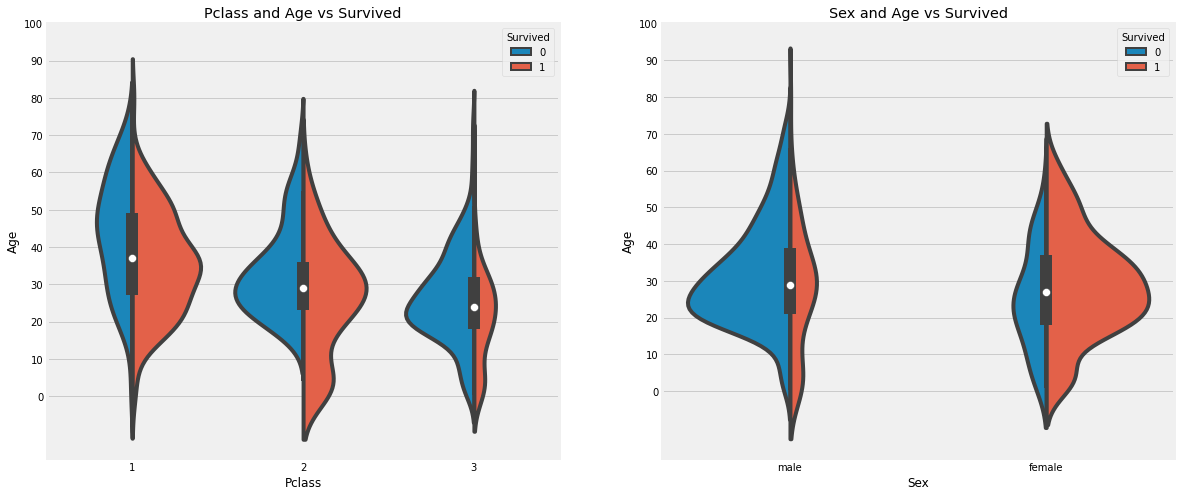

In [14]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=data, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

호칭??에 따른 생존률을 확인해보자 (Mr, Mrs, Miss 등등)

In [15]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [16]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Dr는 여성이 한 명밖에 없기 때문에 그냥 남성이라고 생각..

In [17]:
# Capt, Col 같이 사람이 적은 호칭은 다른 호칭으로 바꾸어 준다.
data['Initial'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Mlle', 'Mme', 'Ms', 'Rev', 'Sir'],
                       ['Mr', 'Other', 'Mrs', 'Mr', 'Mr', 'Other', 'Mrs', 'Mr', 'Miss', 'Miss', 'Miss', 'Other', 'Mr'], inplace=True)

In [18]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

제대로 된 예측을 하기 위해서 빈칸을 최대한 채워주어야 한다.
우선 나이부터 채워주자.

In [19]:
data['Age'].isnull().sum()

177

빈칸이 177개나 된다... 그냥 호칭 별로 평균 나잇값으로 넣어주자.

In [20]:
data.loc[(data.Age.isnull()) & (data.Initial == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial == 'Other'), 'Age'] = 46

In [21]:
data.Age.isnull().any() # 빈칸이 채워진 것을 확인할 수 있다.

False

나이대 별 인원 수 확인

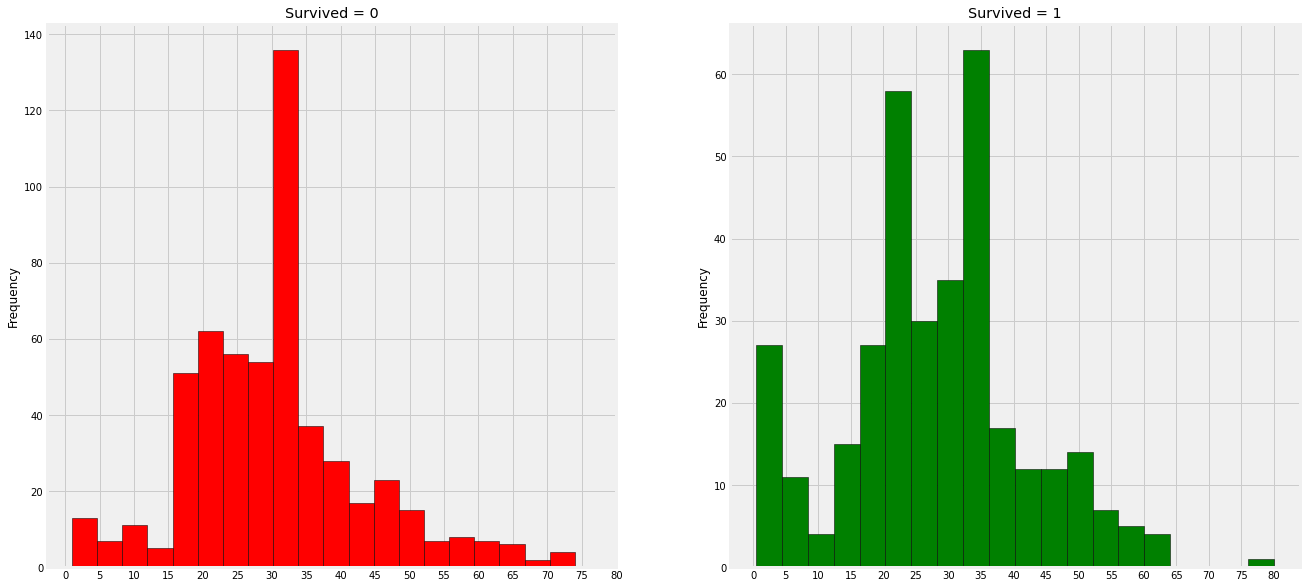

In [22]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived'] == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
ax[0].set_xticks(range(0, 85, 5))

data[data['Survived'] == 1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived = 1')
ax[1].set_xticks(range(0, 85, 5))

plt.show()

좌석 등급, 호칭 별 인원 분포

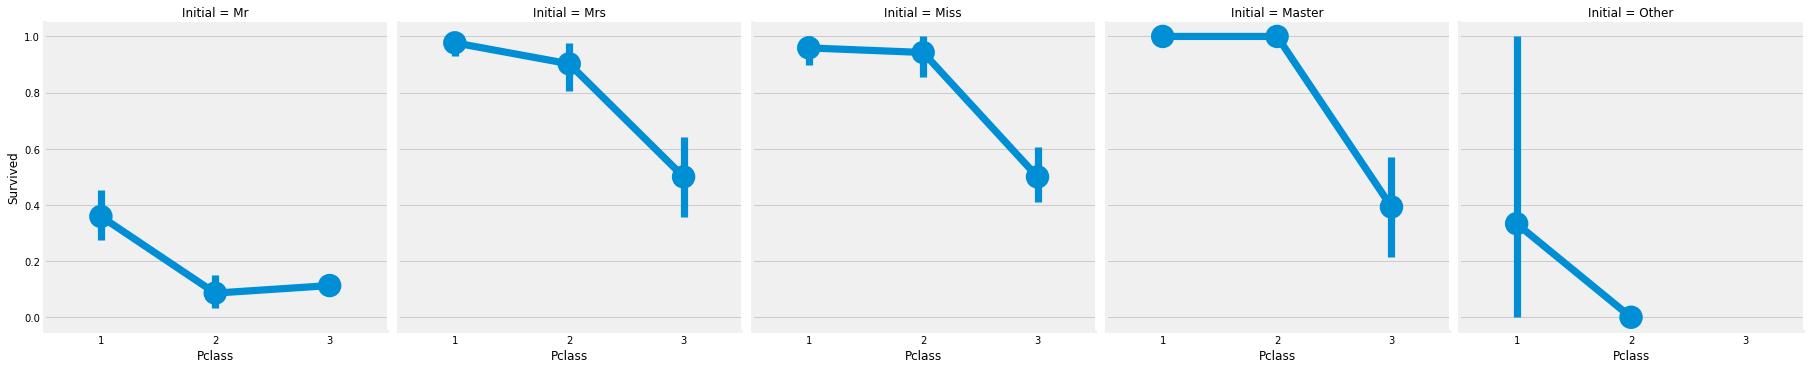

In [23]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

### Embarked

탑승항구 별로 생존률을 확인해보자.

In [24]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

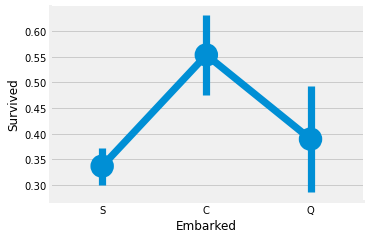

In [25]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

탑승항구별 다양한 분포들을 살펴보자.<br>
(0, 0): 탑승 항구별 인원<br>
(0, 1): 탑승 항구별 성비<br>
(1, 0): 탑승 항구별 생존률<br>
(1, 1): 탑승 항구별 좌석 등급<br>

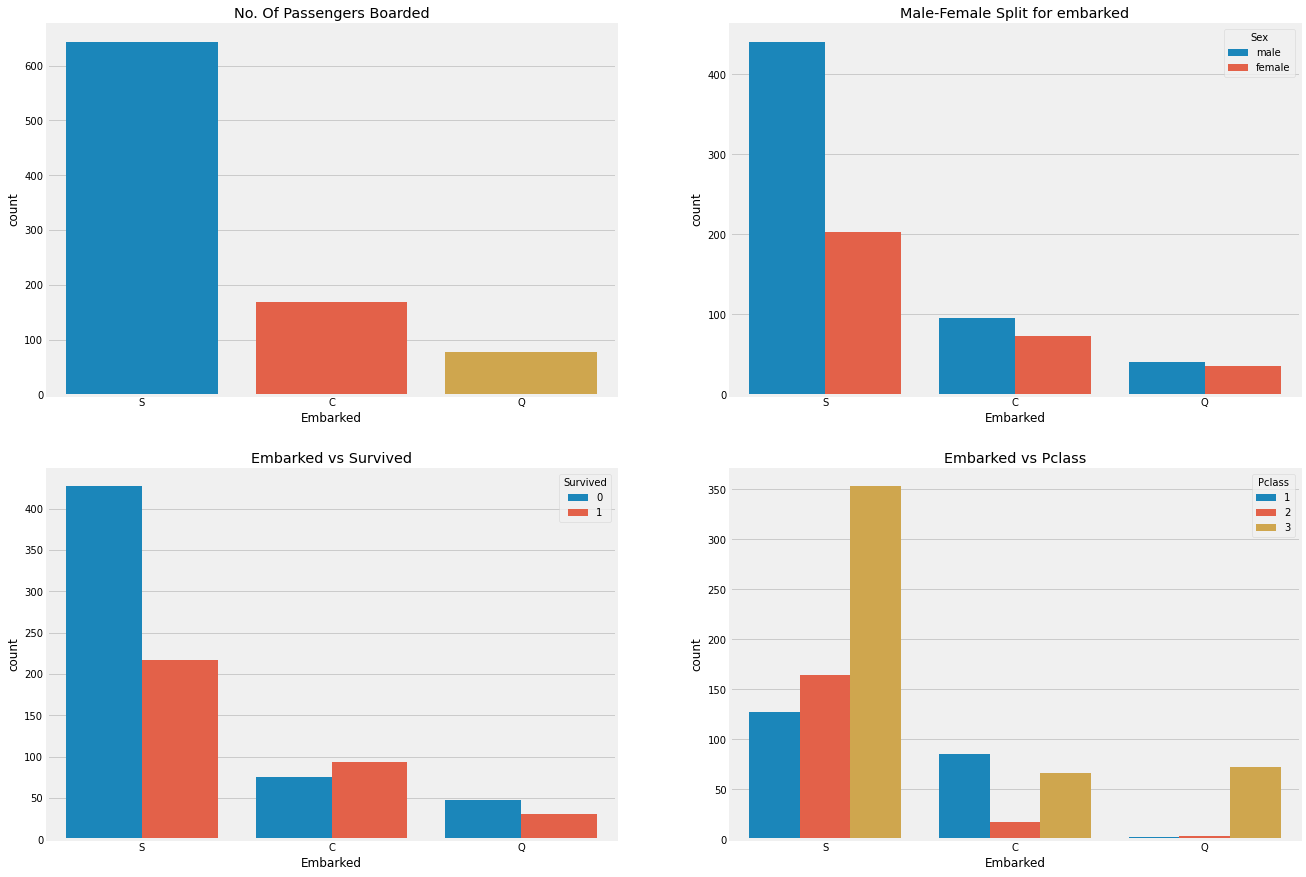

In [26]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')

plt.show()

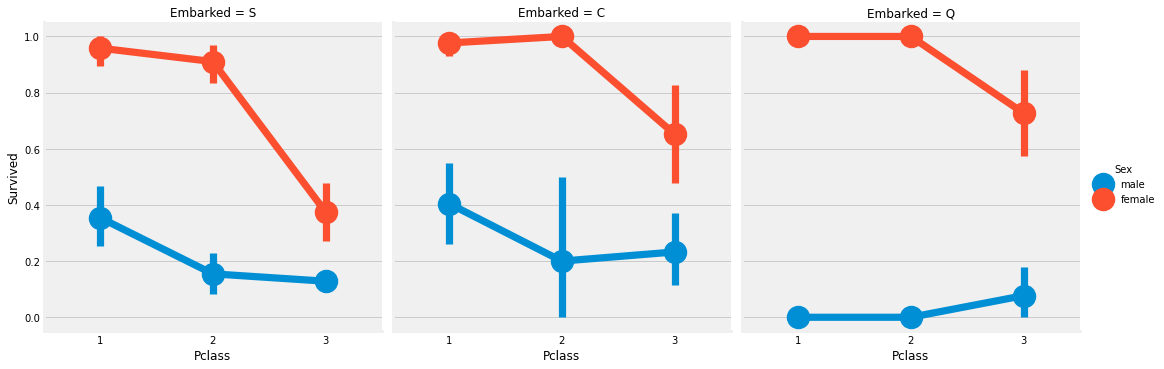

In [27]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

이제 Embarked도 빈칸을 채우자

In [28]:
data['Embarked'].isnull().sum()

2

빈 칸이 두개밖에 없다... 그냥 제일 많은 S로 채워주자.

In [29]:
data['Embarked'].fillna('S', inplace=True)

In [30]:
data['Embarked'].isnull().any()

False

### SibSp
형제 자매, 배우자 인원에 따른 생존률을 확인해보자

In [31]:
pd.crosstab(data.SibSp, data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


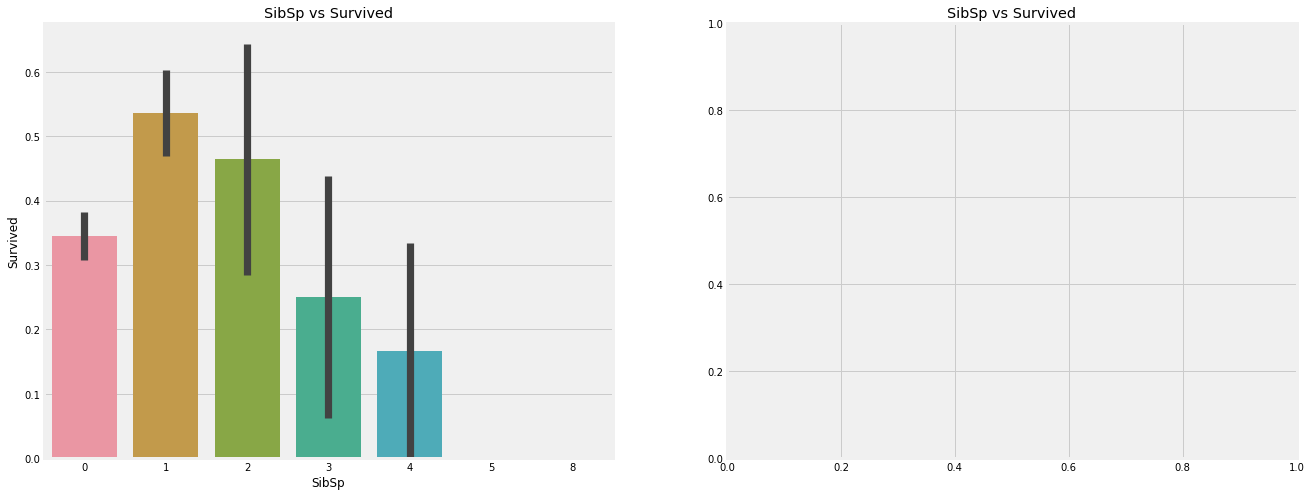

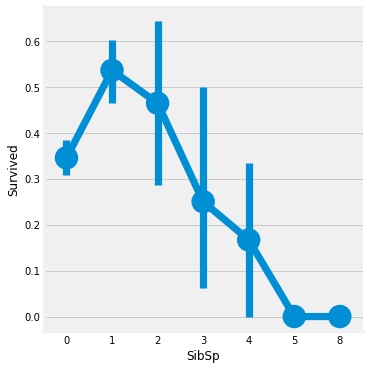

In [32]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')

# plt.close(2)
plt.show()

In [33]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### Parch
부모, 자식 인원에 따른 생존률을 확인해보자

In [34]:
# 우선 pclass 별 인원수 확인
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


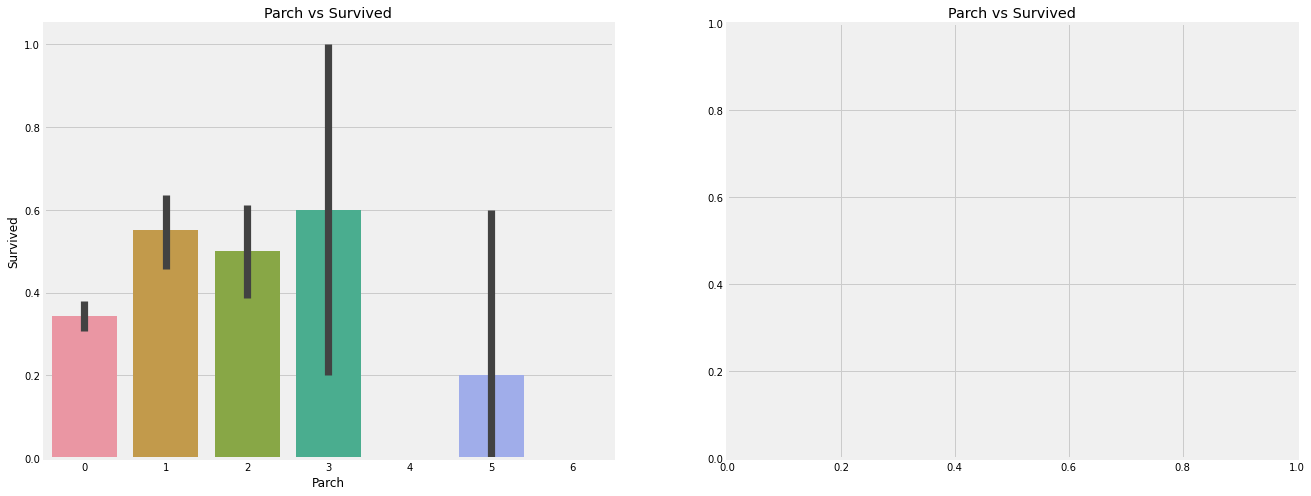

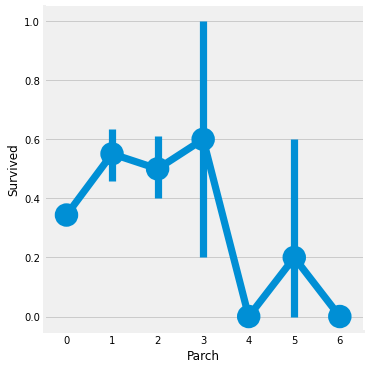

In [35]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

# plt.close(2)
plt.show()

### Fare
운임료에 따른 생존률 확인 (관련이 있을까 싶다..)

In [36]:
print('Highest: ', data['Fare'].max())
print('Lowest: ', data['Fare'].min())
print('Average: ', data['Fare'].mean())

Highest:  512.3292
Lowest:  0.0
Average:  32.2042079685746


공짜로 탄 사람도 있음 ㅋㅋ

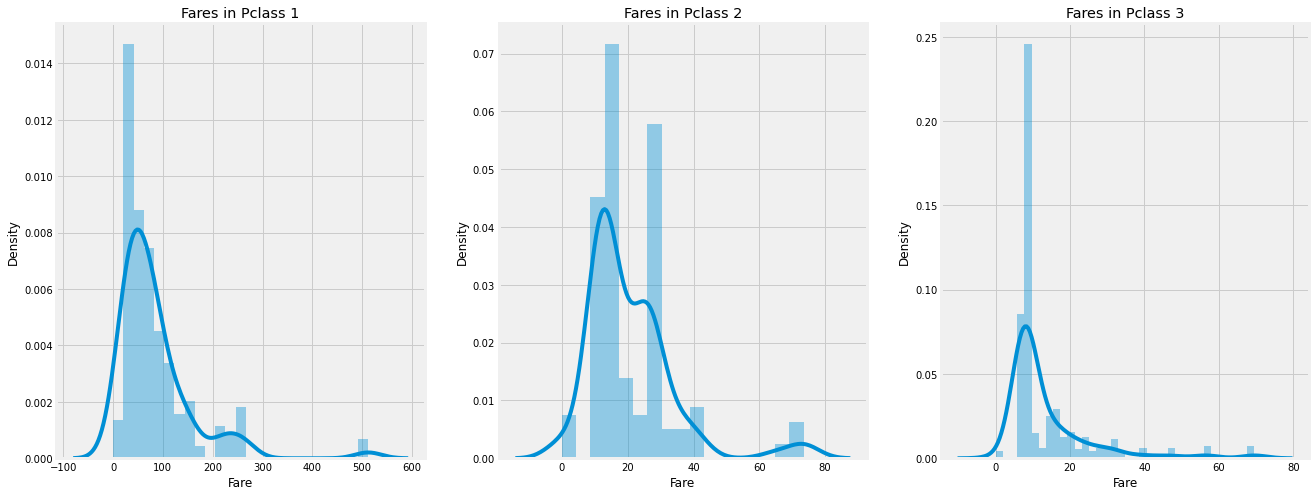

In [37]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(data[data['Pclass'] == 1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass'] == 2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass'] == 3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

### 정리 하면 다음과 같다. <br><br>
**Sex**: 여성이 남성보다 생존률이 높다. <br>
**Pclass**: 좌석 등급이 높을수록 생존률이 높다. <br>
**Age**: 0-10, 20-35가 생존률이 높다. 하지만 20~35세는 죽은 사람도 많다. <br>
**Embarked**: C에서 탑승한 인원이 생존률이 높다. C에서 탄 인원이 Pclass 1에 많이 타서 그런 것일까? <br>
**SibSp + Parch**: 가족 단위가 2, 4명인 가족이 생존률이 높다. <br>

각 column들 간의 상관관계를 알아보자

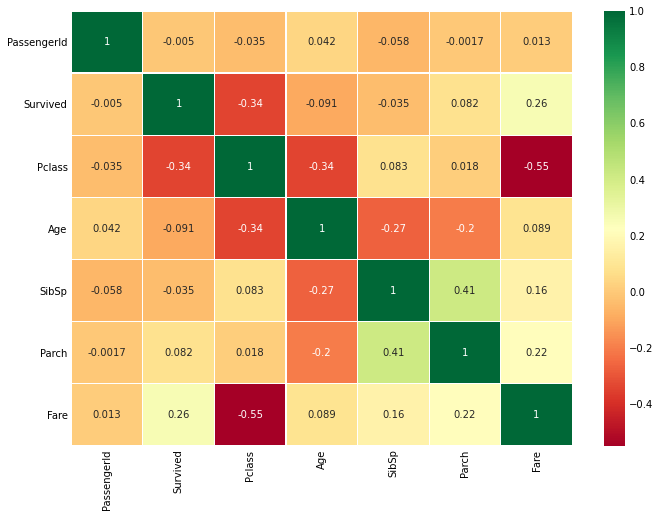

In [38]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)

plt.show()

### 나이 분포가 너무 많으니 나이대 별로 5개의 그룹 정도로 나누자

In [39]:
data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age']>16) & (data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32) & (data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48) & (data['Age']<=64), 'Age_band'] = 3
data.loc[data['Age']>64, 'Age_band'] = 4

In [40]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [41]:
# 그룹 별 인원 수
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


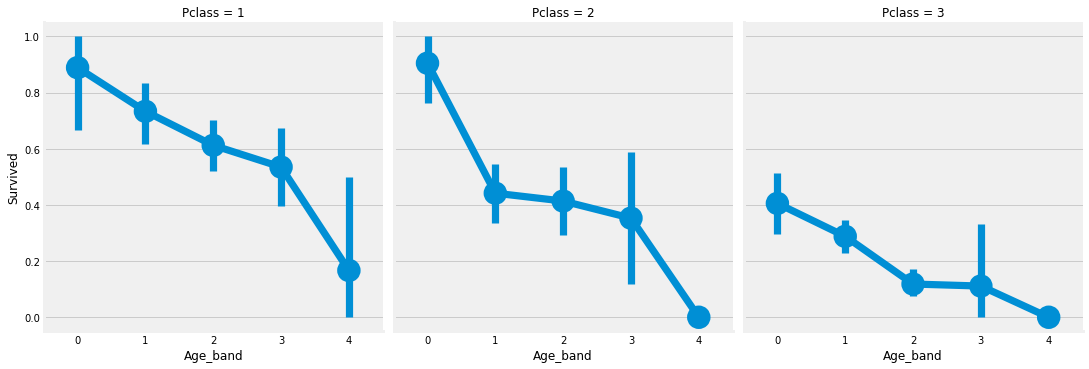

In [42]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

어릴수록 생존률이 높은 것을 알 수 있다.

다음은 가족인원 구성 별 생존률을 확인해보자

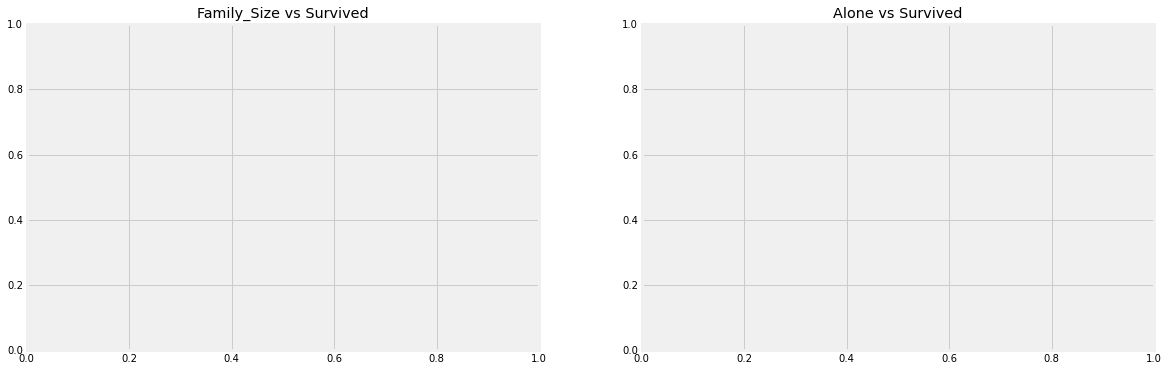

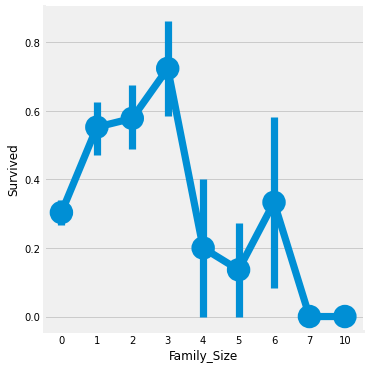

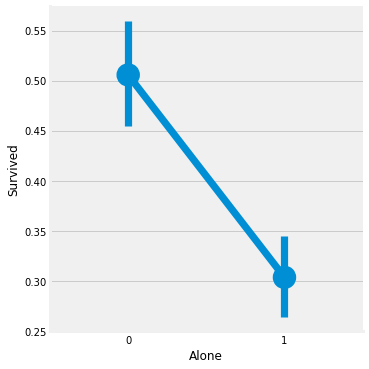

In [43]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']

data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1 # Family_Size가 0이면 혼자라는 뜻.

f, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')

# plt.close(2)
# plt.close(3)
plt.show()

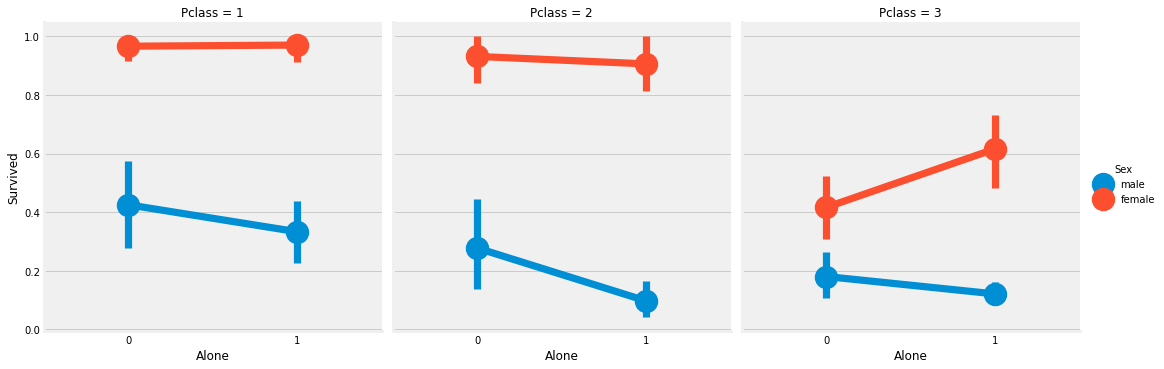

In [44]:
# 혼자 탄 사람들의 성비
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

운임 요금도 다양하니 나이처럼 4개 정도 그룹지어 주자

In [45]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [46]:
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91, 'Fare_cat'] = 0
data.loc[(data['Fare']>7.91) & (data['Fare']<=14.454), 'Fare_cat'] = 1
data.loc[(data['Fare']>14.454) & (data['Fare']<=31), 'Fare_cat'] = 2
data.loc[(data['Fare']>31) & (data['Fare']<=513), 'Fare_cat'] = 3

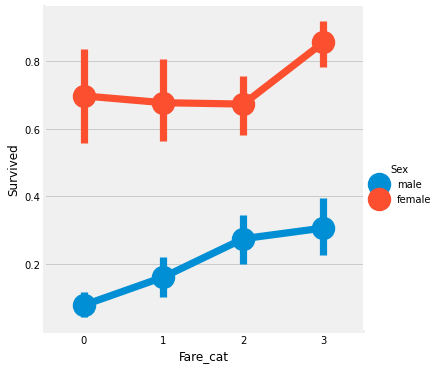

In [47]:
sns.factorplot('Fare_cat', 'Survived', hue='Sex', data=data)
plt.show()

데이터를 모델 학습에 사용하려면 숫자형태로 바꿔 주어야 한다. str type인 column들을 int형으로 바꿔주자.

In [48]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)

In [49]:
# 사용하지 않는 column을 삭제
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)

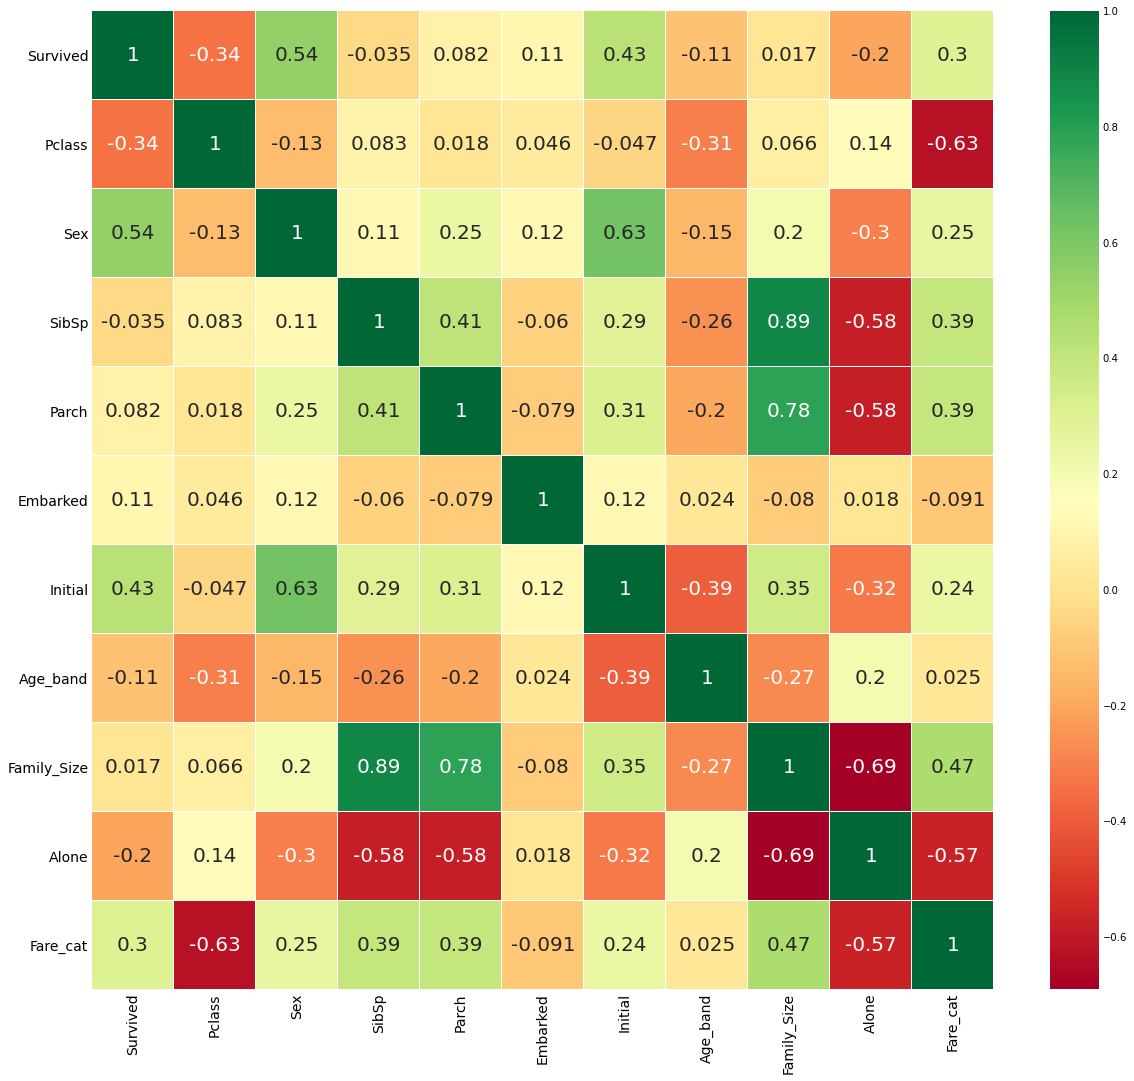

In [50]:
# 이제 다시 column간의 상관관계를 살펴보자. 아까는 볼 수 없던 Sex, Embarked, Initial column이 생긴 것을 볼 수 있다.
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size': 20})
fig=plt.gcf()
fig.set_size_inches(18, 18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.show()

이제 모델을 만들고 생존 여부를 예측해보자.

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [52]:
train, test = train_test_split(data, test_size=0.2, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

### (Radial)rbf-SVM

In [53]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print(f'Accuracy for rbf SVM is {100*metrics.accuracy_score(prediction1, test_Y):.2f}%')

Accuracy for rbf SVM is 81.01%


### linear SVM

In [54]:
model = svm.SVC(kernel='linear', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print(f'Accuracy for linear SVM is {100*metrics.accuracy_score(prediction2, test_Y):.2f}%')

Accuracy for linear SVM is 79.89%


### Logistic Regression

In [55]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print(f'Accuracy of the Logistic Regression is {100*metrics.accuracy_score(prediction3, test_Y):.2f}%')

Accuracy of the Logistic Regression is 77.09%


### Decision Tree

In [56]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print(f'Accuracy of the Decision Tree is {100*metrics.accuracy_score(prediction4, test_Y):.2f}%')

Accuracy of the Decision Tree is 76.54%


### K-Nearest Neighbors(KNN)

In [57]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print(f'Accuracy of the KNN is {100*metrics.accuracy_score(prediction5, test_Y):.2f}%')

Accuracy of the KNN is 79.89%


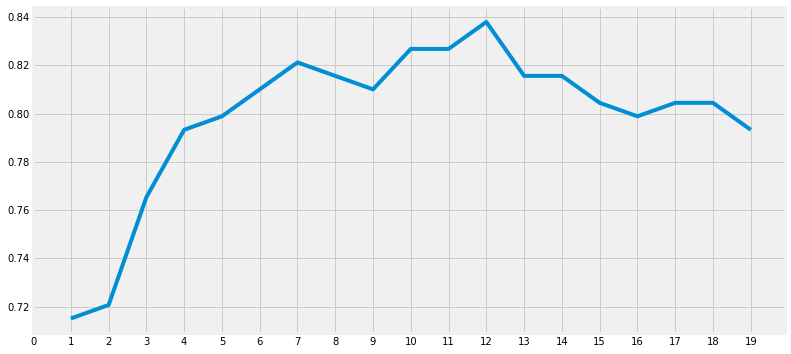

Accuracies for different values of n are: [0.7150838  0.72067039 0.76536313 0.79329609 0.79888268 0.81005587
 0.82122905 0.81564246 0.81005587 0.82681564 0.82681564 0.83798883
 0.81564246 0.81564246 0.80446927 0.79888268 0.80446927 0.80446927
 0.79329609] with the max value as 0.8379888268156425


In [58]:
# K의 값에 따른 정확도를 살펴보았다. 언제 가장 높은 정확도를 가질까?
a_index = list(range(1, 20))
a = pd.Series()
x = [i for i in range(20)]
for i in list(range(1, 20)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction=model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))

plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)

plt.show()

print('Accuracies for different values of n are:',a.values, 'with the max value as', a.values.max())

이웃의 수(K)를 12라고 했을 때의 값이 0.8379... 으로 가장 높게 나온다.

### Gaussian Naive Bayes

In [59]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print(f'Accuracy of the Naive Bayes is {100*metrics.accuracy_score(prediction6, test_Y):.2f}%')

Accuracy of the Naive Bayes is 78.21%


### Random Forests

In [60]:
model = RandomForestClassifier()
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print(f'Accuracy of the Random Forests is {100*metrics.accuracy_score(prediction7, test_Y):.2f}%')

Accuracy of the Random Forests is 78.77%


## 교차 검증을 통해 정확도를 조금 더 올려보자

In [61]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits=10, random_state=22, shuffle=True)
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear svm', 'Radial svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=12), 
          DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]

for model in models:
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_models_dataframe2 = pd.DataFrame({'CV Mean': xyz, 'Std': std}, index=classifiers)

In [62]:
new_models_dataframe2

,CV Mean,Std
Linear svm,0.784607,0.057841
Radial svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.803645,0.039622
Decision Tree,0.804732,0.041094
Naive Bayes,0.795843,0.054861
Random Forest,0.812609,0.048286


눈으로 보기 쉽게 그래프를 그려보자 (boxplot)

<AxesSubplot:>

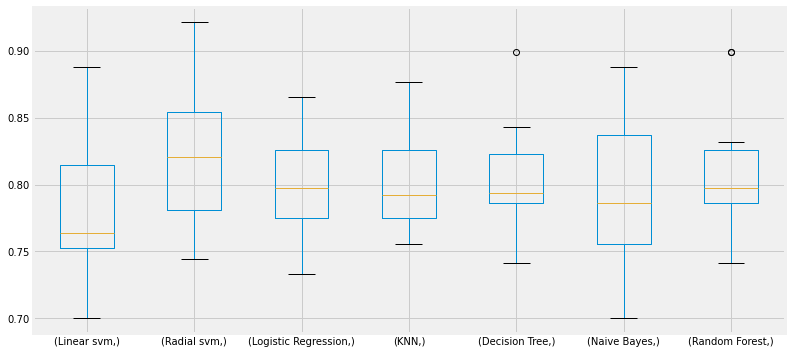

In [64]:
plt.subplots(figsize=(12, 6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

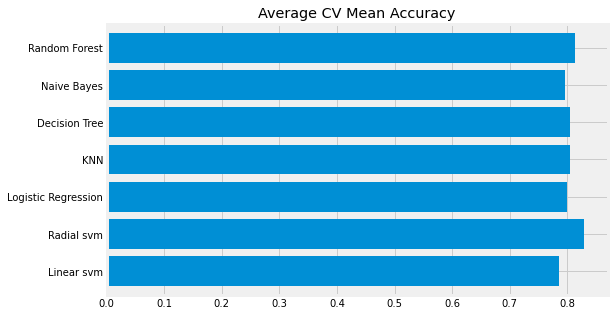

In [65]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8) # barh = 가로 바
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8, 5)

plt.show()

Radial svm이 정확도가 가장 높은 것으로 추정

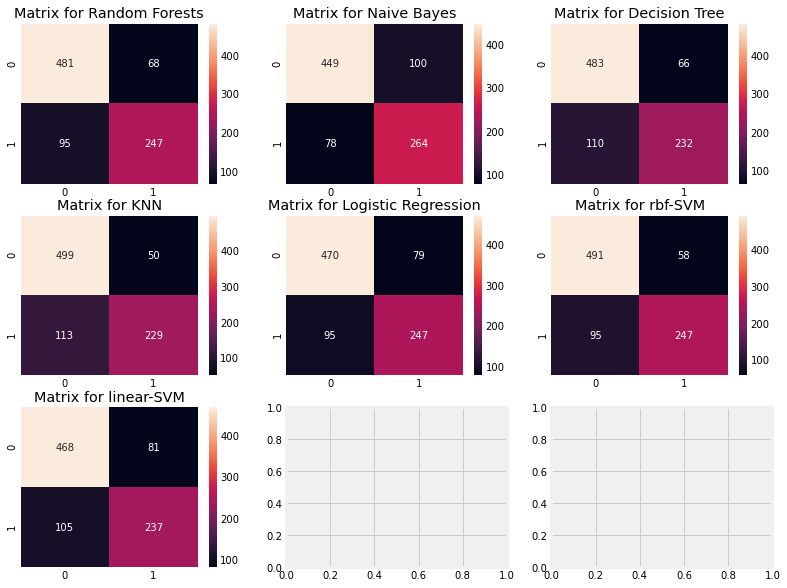

In [69]:
f, ax = plt.subplots(3, 3, figsize=(12, 10))
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 0], annot=True, fmt='2.0f')
ax[0, 0].set_title('Matrix for Random Forests')

y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 1], annot=True, fmt='2.0f')
ax[0, 1].set_title('Matrix for Naive Bayes')

y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 2], annot=True, fmt='2.0f')
ax[0, 2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=12), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 0], annot=True, fmt='2.0f')
ax[1, 0].set_title('Matrix for KNN')

y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 1], annot=True, fmt='2.0f')
ax[1, 1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 2], annot=True, fmt='2.0f')
ax[1, 2].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2, 0], annot=True, fmt='2.0f')
ax[2, 0].set_title('Matrix for linear-SVM')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

위 그림에서 검정 부분을 최대한 줄여야 정확한 예측이라고 할 수 있다. <br>
Random Forest를 기준으로 <br>
(0, 1)은 살아 있는 사람인데 죽은 것으로 예측(95명) <br>
(1, 0)은 죽은 사람인데 살아 있다고 예측(68명)

## SVM과 Random Forest는 hyperparameter를 조정함으로써 최적값을 구할 수 있다.

### Random Forests

In [70]:
from sklearn.model_selection import GridSearchCV

In [72]:
n_estimators = range(100, 1100, 100)
hyper = {'n_estimators': n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.819327098110602
{'n_estimators': 300}


n_estimators = 300일 때 정확도가 가장 높다고 한다.

### SVM

In [74]:
C = [0.05, 0.1, 0.2,  0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']
hyper = {'C': C, 'gamma': gamma, 'kernel': kernel}
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
{'C': 0.4, 'gamma': 0.3, 'kernel': 'rbf'}


C = 0.4, gamma = 0.3, kernel = rbf일 때 가장 정확도가 높다.

## Ensemble
여러 모델을 voting, bagging, boosting등으로 앙상블 해본다.

### Voting

In [75]:
# 투표 방식으로 앙상블
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=12)),
                                                ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.4, gamma=0.3)),
                                                ('RFor', RandomForestClassifier(n_estimators=300, random_state=0)),
                                                ('LR', LogisticRegression(C=0.05)),
                                                ('DT', DecisionTreeClassifier(random_state=0)),
                                                ('NB', GaussianNB()),
                                                ('svm', svm.SVC(probability=True, kernel='linear'))
                                               ], voting='soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X, test_Y))
cross=cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring='accuracy')
print('The CV score is:', cross.mean())

The accuracy for ensembled model is: 0.7988826815642458
The CV score is: 0.8260424469413234


교차검증까지 완료 후 정확도가 약 82.6%이다.

### Bagging

KNN

In [77]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is:', result.mean())

The accuracy for bagged KNN is: 0.7988826815642458
The cross validated score for bagged KNN is: 0.8160424469413232


Decision Tree

In [78]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decition Tree is:', metrics.accuracy_score(prediction, test_Y))
result=cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:', result.mean())

The accuracy for bagged Decition Tree is: 0.7877094972067039
The cross validated score for bagged Decision Tree is: 0.8171410736579275


### Boosting

AdaBoost(Adaptive Boosting)

In [79]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBosst is:', result.mean())

The cross validated score for AdaBosst is: 0.8249188514357055


Stochastic Gradient Boosting

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is:', result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


In [81]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:', result.mean())

[12:20:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

Hyperparameter Tuning for AdaBoost

In [82]:
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.01, 0.03, 0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'n_estimators': n_estimators, 'learning_rate': learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 140 candidates, totalling 700 fits
0.8293892411022534
{'learning_rate': 0.1, 'n_estimators': 100}


가장 정확도가 높은 AdaBoost

In [83]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.1)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

SyntaxError: invalid syntax (<ipython-input-83-ed895f4321c1>, line 1)

In [ ]:
f, ax = plt.subplots(2, 2, figsize=(15, 12))
model=RandomForestClassifier(n_estimators=300, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 0])
ax[0, 0].set_title('Feature Importance in Random Forests')

model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 1], color='#ddff11')
ax[0, 1].set_title('Feature Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 0], cmap='RdYlGn_r')
ax[1, 0].set_title('Feature Importance in Gradient Boosting')

model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 1], color='#FD0F00')
ax[1, 1].set_title('Feature Importance in XGBoost')

plt.show()